## Histogram Equalization

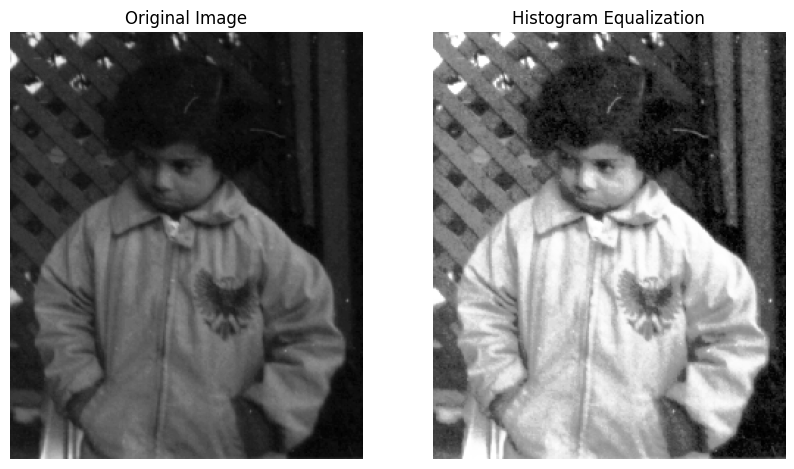

In [1]:
from mip.display.image import show, read, subplot_images

import numpy as np



def hist_eq(img):
    """
    Histogram Equalization
    ----------------------

    Formula: 
    * Image: f(x, y)
    * Image Size: h x w
    * Number of Pixels: S = h x w
    * Histogram: h(i) = Number of Pixels with Intensity i
    * Probability: p(i) = h(i) / S
    * Cumulative Probability: c(i) = sum([p(i) for i in range(0, i)])
    * New Intensity: z(i) = 255 x c(i)
    """
    h, w = img.shape
    s = h * w
    out = img.copy()

    hist = np.array([np.sum(img == i)/s for i in range(256)])
    cdf = np.cumsum(hist)
    z = 255 * cdf

    for i in range(256):
        out[img == i] = z[i]
    return out, hist, cdf

img = read(r"D:\Educational\MSc\MIP\assets\pout.png", 'GRAY')

hist_img, hist, cdf = hist_eq(img)

subplot_images([img, hist_img], titles=['Original Image', 'Histogram Equalization'])

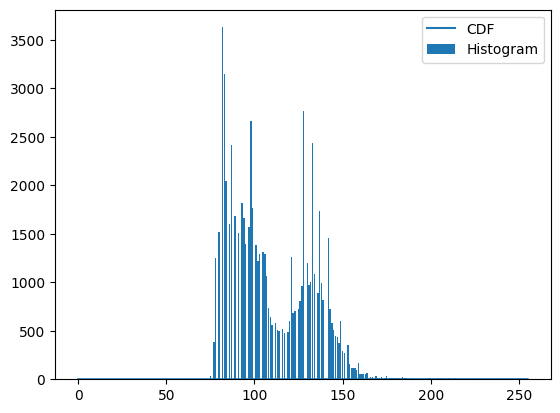

In [15]:
import matplotlib.pyplot as plt

plt.bar(np.arange(0, 256), hist*img.shape[0]*img.shape[1], label='Histogram')
plt.plot(cdf, label='CDF')
plt.legend()
plt.show()

0.9999999999999991

## Image Rescaling

In [34]:
from mip.display.image import show, read, subplot_images

import numpy as np


def resize_copy(image_array: np.ndarray, factor: int) -> np.ndarray:
    height, width = image_array.shape

    new_height = int(height * factor)
    new_width = int(width * factor)

    # creating a new image array with the new height and width
    resized_image = np.zeros((new_height, new_width), dtype=np.uint8)

    # copying original image pixels to new image pixels
    # resized_image[:new_height:factor, :new_width:factor] = image_array
    # resized_image[1::factor, 1::factor] = image_array
    # resized_image[1::factor, 0::factor] = image_array
    # resized_image[0::factor, 1::factor] = image_array
    
    resized_image[:new_height:factor, :new_width:factor] = img
    resized_image[1::factor, 1::factor] = image_array

    resized_image[1::factor, 0::factor] = image_array
    resized_image[0::factor, 1::factor] = image_array

    return (resized_image, image_array)

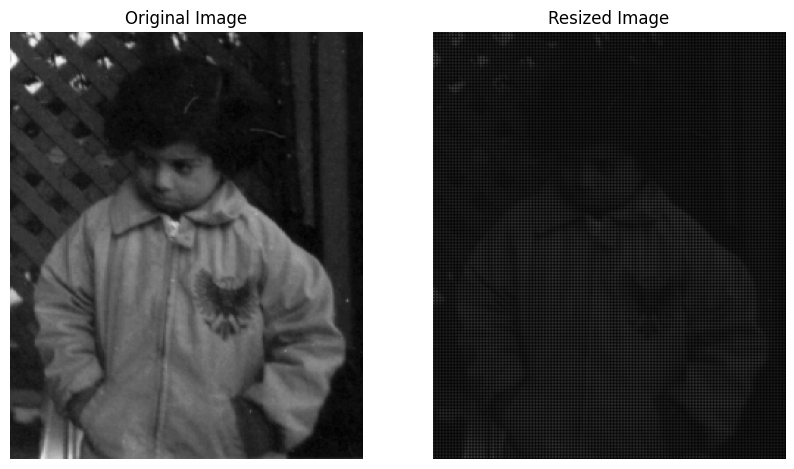

Original Image Shape: (291, 240)
Resized Image Shape: (1455, 1200)


In [38]:
img = read(r"../assets/pout.png", 'GRAY')

resized_image, original_image = resize_copy(img, 5)

subplot_images([img, resized_image], titles=['Original Image', 'Resized Image'])

print(f"Original Image Shape: {img.shape}")
print(f"Resized Image Shape: {resized_image.shape}")

(291, 240)
(2910, 2400)


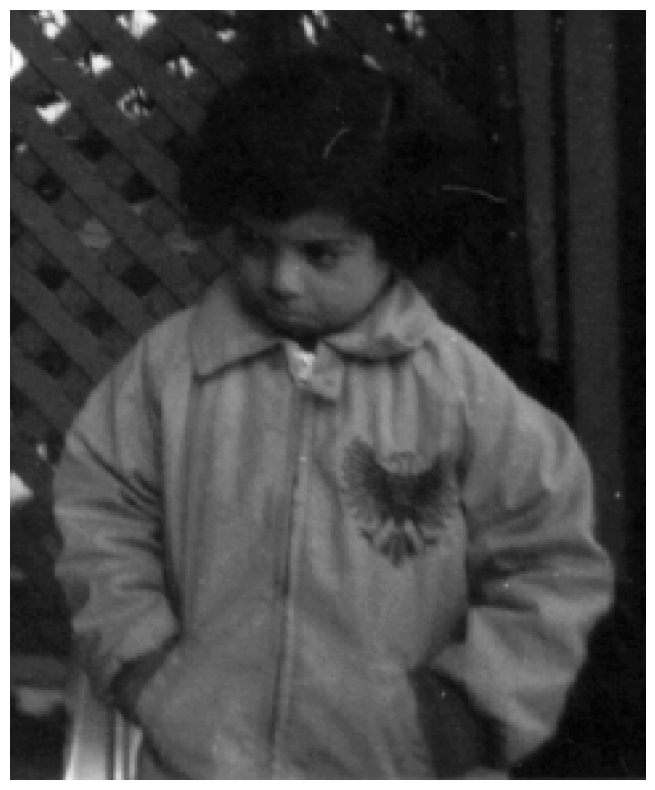

In [45]:
factor = 10

resized_image = np.kron(img, np.ones((factor, factor)))

# # creating a new image array with the new height and width


print(img.shape)
print(resized_image.shape)
show(resized_image)


# Image Rescaling by zero padding

In [103]:
def zero_padding(image_array: np.ndarray, factor: int):
    """
    
    """
    height, width = image_array.shape
    
    # Compute the Fourier transform of the image array.
    fft_img = np.fft.fft2(image_array)
    
    #shifted fft for shifting the zero frequency component to the center of the spectrum
    fft_shifted = np.fft.fftshift(fft_img)

    # Zero pad the Fourier transform.
    row_pad = np.zeros((1, width))
    column_pad = np.zeros((height+2, 1))

    padded_image = np.vstack([row_pad, fft_shifted, row_pad])

    padded_image = np.hstack([column_pad, padded_image, column_pad])
    
    padded_image = np.fft.ifftshift(padded_image)
    
        # Compute the inverse Fourier transform of the zero padded Fourier transform.
    I_padded = np.fft.ifft2(padded_image)
    
    # multiply by the factor to get the correct intensity values
    I_padded = I_padded * factor
    
    return I_padded.real.astype(np.uint8)


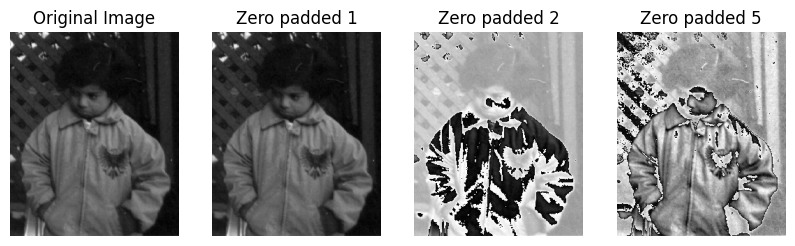

In [105]:
img = read(r"../assets/pout.png", 'GRAY')

I_zeropad_1 = zero_padding(img, 1)

I_zeropad_2 = zero_padding(img, 2)

I_zeropad_5 = zero_padding(img, 5)

subplot_images([img,  I_zeropad_1, I_zeropad_2, I_zeropad_5], 
               titles=['Original Image', 'Zero padded 1', 'Zero padded 2', 'Zero padded 5'])

## Interpolation

In [ ]:
class RescaleWithInterpolation:

    def __init__(self, I: Any, factor: int, filter: str) -> None:
        self.image = I
        self.factor = factor
        self.filter = filter
        self.output_image = None

    def resize_filter(self):
        image_array = np.array(self.image)

        if self.filter == 'tent':
            x = np.linspace(-1, 1, num=self.factor)
            h_x = np.array([(1 - np.abs(x)) if abs(x) <= 1 else 0 for x in x])

        elif self.filter == 'bell':
            x = np.linspace()


# Image Filtering

## Average Filtering

Original Image Size: (256, 256), Filtered Size: (252, 252)
Original Image Size: (256, 256), Filtered Size: (252, 252)
Original Image Size: (256, 256), Filtered Size: (254, 254)
Original Image Size: (256, 256), Filtered Size: (254, 254)


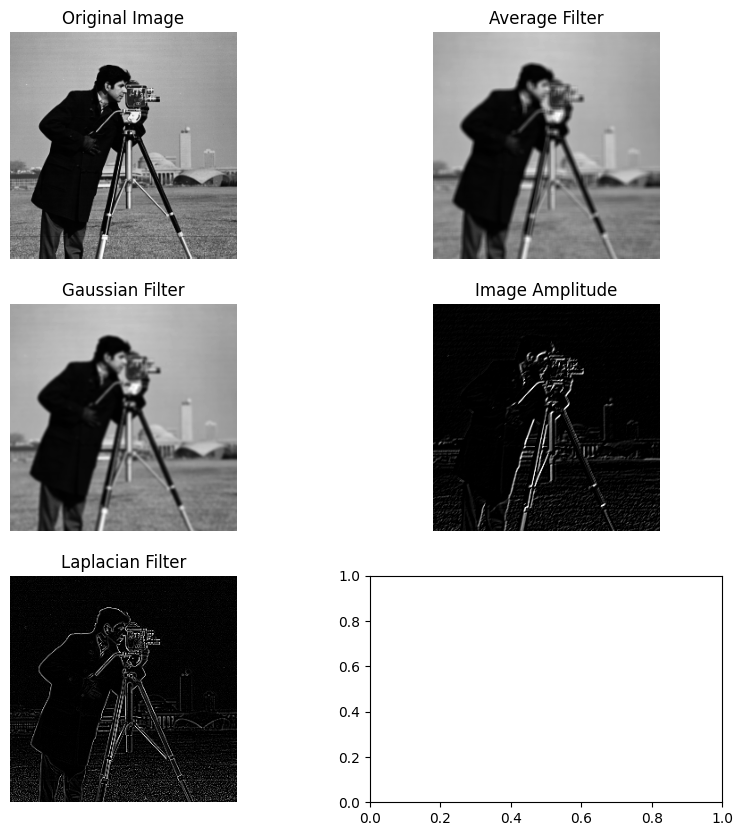

In [2]:
from mip.display.image import show, read, subplot_images

import numpy as np


def image_filter(I: np.ndarray, filter: np.ndarray) -> np.ndarray:
    """
    Apply a filter to an image.
    """
    image_array = I
    filter_array = filter
    filter_size = filter_array.shape
    image_size = image_array.shape
    out_size = (image_size[0] - filter_size[0] + 1,
                image_size[1] - filter_size[1] + 1)
    print(f"Original Image Size: {image_size}, Filtered Size: {out_size}")

    image_filtered = np.zeros(out_size)

    for i in range(out_size[0]):
        for j in range(out_size[1]):
            image_filtered[i, j] = np.sum(
                image_array[i:i+filter_size[0], j:j+filter_size[1]] * filter_array)
    image_filtered = np.clip(image_filtered, 0, 255).astype(np.uint8)
    return image_filtered

img = read(r"../assets/cameraman.png", 'GRAY')
m = np.ones((5,5))/25
g = 1/81 * np.array([[1,2,3,2,1],
                     [2,4,6,4,2],
                     [3,6,9,6,3],
                     [2,4,6,4,2],
                     [1,2,3,2,1]])
tou = np.array([[0,-1,0],
                [-1,0,1],
                [0,1,0]])
delta = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])

subplot_images([img, image_filter(img, m),
                image_filter(img, g),
                image_filter(img, tou),
                image_filter(img, delta)], fig_size=(10, 10), 
                order=(3,2),
                titles=['Original Image', 'Average Filter', 
                        'Gaussian Filter', 'Image Amplitude', 
                        'Laplacian Filter'])


## Median Blur

Original Image Size: (256, 256), Filtered Size: (254, 254)
Original Image Size: (256, 256), Filtered Size: (252, 252)


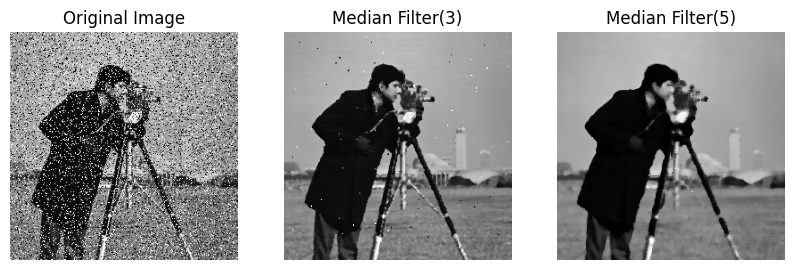

Original Image Size: (256, 256), Filtered Size: (254, 254)
Original Image Size: (256, 256), Filtered Size: (252, 252)


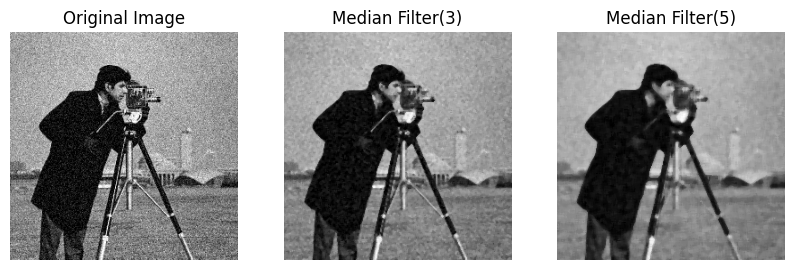

In [3]:
def median_filter(I:np.array, size:int)->np.ndarray:
    """
    Apply a median filter to an image.
    """
    image_array = I
    image_size = image_array.shape
    out_size = (image_size[0] - size + 1,
                image_size[1] - size + 1)
    print(f"Original Image Size: {image_size}, Filtered Size: {out_size}")

    image_filtered = np.zeros(out_size)

    for i in range(out_size[0]):
        for j in range(out_size[1]):
            image_filtered[i, j] = np.median(
                image_array[i:i+size, j:j+size])
    image_filtered = np.clip(image_filtered, 0, 255).astype(np.uint8)
    return image_filtered

img = read(r"../assets/cameraman_sp.png", 'GRAY')
subplot_images([img, median_filter(img, 3), median_filter(img, 5)], fig_size=(10, 5), 
                order=(1,3),
                titles=['Original Image', 'Median Filter(3)', 'Median Filter(5)'])

img = read(r"../assets/cameraman_nse.png", 'GRAY')
subplot_images([img, median_filter(img, 3), median_filter(img, 5)], fig_size=(10, 5), 
                order=(1,3),
                titles=['Original Image', 'Median Filter(3)', 'Median Filter(5)'])